<a href="https://colab.research.google.com/github/anasjy/appliance-energy-prediction/blob/main/Appliance_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**
# **All about data**
Data-driven prediction of energy use of appliances   

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

# **Attribute Information**
Date: time (yr:mon:day:hr:min:sec) Appliances: energy use in Wh lights: Energy use of light fixtures in the house(Wh)

T1: Temperature in kitchen area(C), RH_1: Humidity in kitchen area(%)   

T2: Temperature in living room area(C), RH_2: Humidity in living room(%)  

T3: Temperature in laundry room, RH_3: Humidity in laundry room area(%)   

T4: Temperature in office room(C), RH_4: Humidity in office room(%)   

T5: Temperature in bathroom in (C), RH_5: Humidity in bathroom(%)           

T6: Temperature outside the building (north side) in (C), RH_6: Humidity outside the building (northside)%    

T7: Temperature in ironing room in (C), RH_7: Humidity in ironing room in (%)  

T8:Temperature in teenager room 2 in (C), RH_8: Humidity in teenager room 2 in (%)  

T9: Temperature in parents room in (C), RH_9: Humidity in parents room in %

To: Temperature outside (from Chievres weather station) in (C) Pressure (from Chievres weather station): in mm Hg RH_out: Humidity outside (from Chievres weather station) in (%),

Wind speed (from Chievres weather station), in m/s  
Visibility (from Chievres weather station), in km   
Tdewpoint (from Chievres weather station), Â°C   
rv1, Random variable 1, nondimensional   
rv2, Random variable 2, nondimensional   

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.



# **Import Packages**
# First Import necessary packages and import the dataset

In [7]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Exploratory Data Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
slr = pd.read_csv('/content/drive/MyDrive/Capstone machine learning regression/data_application_energy.csv')

In [14]:
slr

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [15]:
slr.shape

(19735, 29)

In [16]:
slr.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [17]:
slr.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [18]:
slr.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [19]:
slr.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [21]:
slr.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [22]:
slr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [25]:
#Totoal number of duplicate rows present in this data.

duplicate_rows = slr[slr.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)



Number of duplicate rows: (0, 29)


# In this dataset there are no duplicate rows

# **Data Preparation and Cleaning**

In [26]:
slr["Appliances"].isnull().sum()

0

In [27]:
#null vales
slr.isnull().sum().sort_values(ascending=False)

rv2            0
T6             0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
RH_6           0
rv1            0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
date           0
dtype: int64

# As you can see there are no null values.

In [28]:
slr= slr.drop(['date'], axis=1)

# Date dropping reason: As we are not trying to analyze the problem as Time Series rather regress on "Appliance" column.

# **Data Visualization**

Let's move on the extract information about data and also dealing with it.

In [29]:
# 80% of the data is use for the training of the models and the rest is used for testing
train, test = train_test_split(slr,test_size=0.20,random_state=40)

In [30]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,97.523436,3.827591,21.678518,40.262143,20.334025,40.426742,22.260086,39.250773,20.850323,39.032470,19.583439,50.920308,7.906445,54.667153,20.258524,35.395282,22.023867,42.945911,19.478627,41.561343,7.407244,755.550528,79.775016,4.051378,38.391414,3.760375,25.024810,25.024810
std,102.668076,7.954862,1.606283,3.981984,2.193174,4.076340,1.999775,3.258047,2.040500,4.351714,1.842384,8.956799,6.072646,31.128068,2.104972,5.126754,1.952412,5.238856,2.009700,4.163317,5.299596,7.394142,14.928167,2.453948,11.807620,4.187537,14.530871,14.530871
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.333333,24.000000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.730000,37.360000,18.790000,37.900000,20.790000,36.900000,19.500000,35.525625,18.288750,45.400000,3.656667,30.073667,18.700000,31.500000,20.790000,39.090000,18.000000,38.500000,3.700000,750.983333,70.333333,2.000000,29.000000,0.916667,12.552884,12.552884
50%,60.000000,0.000000,21.600000,39.626667,20.000000,40.500000,22.100000,38.560000,20.658333,38.400000,19.390000,49.090000,7.300000,55.300000,20.012698,34.882976,22.100000,42.400000,19.390000,40.900000,6.916667,756.100000,83.833333,3.666667,40.000000,3.450000,24.928013,24.928013
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.790000,22.100000,42.163333,20.615000,53.656167,11.260000,83.226806,21.600000,39.000000,23.390000,46.558750,20.600000,44.363333,10.400000,760.966667,91.666667,5.500000,40.000000,6.566667,37.752973,37.752973
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,25.963333,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [31]:
## Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [32]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [33]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.678518,20.334025,22.260086,20.850323,19.583439,7.906445,20.258524,22.023867,19.478627,40.262143,40.426742,39.250773,39.032470,50.920308,54.667153,35.395282,42.945911,41.561343,7.407244,3.760375,79.775016,755.550528,4.051378,38.391414,3.827591,25.024810,25.024810
std,1.606283,2.193174,1.999775,2.040500,1.842384,6.072646,2.104972,1.952412,2.009700,3.981984,4.076340,3.258047,4.351714,8.956799,31.128068,5.126754,5.238856,4.163317,5.299596,4.187537,14.928167,7.394142,2.453948,11.807620,7.954862,14.530871,14.530871
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.333333,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.730000,18.790000,20.790000,19.500000,18.288750,3.656667,18.700000,20.790000,18.000000,37.360000,37.900000,36.900000,35.525625,45.400000,30.073667,31.500000,39.090000,38.500000,3.700000,0.916667,70.333333,750.983333,2.000000,29.000000,0.000000,12.552884,12.552884
50%,21.600000,20.000000,22.100000,20.658333,19.390000,7.300000,20.012698,22.100000,19.390000,39.626667,40.500000,38.560000,38.400000,49.090000,55.300000,34.882976,42.400000,40.900000,6.916667,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.928013,24.928013
75%,22.600000,21.500000,23.290000,22.100000,20.615000,11.260000,21.600000,23.390000,20.600000,43.090000,43.290000,41.790000,42.163333,53.656167,83.226806,39.000000,46.558750,44.363333,10.400000,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.752973,37.752973
max,26.260000,29.856667,29.200000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [34]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     12182
10     1772
20     1313
30      446
40       69
50        5
60        1
Name: lights, dtype: int64

In [35]:
target_vars.describe()

,Appliances
count,15788.000000
mean,97.523436
std,102.668076
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


# **Observations**
Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

Lights column - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now , I will dropping this column

In [36]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
l1 = slr.drop(['lights'], axis=1 , inplace= True) ;

In [37]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
14323,21.20,18.2,22.390000,21.39,19.963333,2.126667,20.361429,21.79,20.0,38.0,41.29,37.9,35.20,48.163333,47.196667,31.332857,42.79,41.09,3.566667,1.750000,88.000000,767.3,3.0,28.833333,0,10.870123,10.870123
8578,20.29,16.7,20.566667,19.79,17.790000,0.000000,19.390000,20.89,18.1,36.2,41.79,37.4,34.09,49.790000,70.863333,35.626667,43.00,41.06,-0.866667,-1.833333,93.333333,764.0,1.0,23.333333,0,9.366347,9.366347


# **Data Visualization**

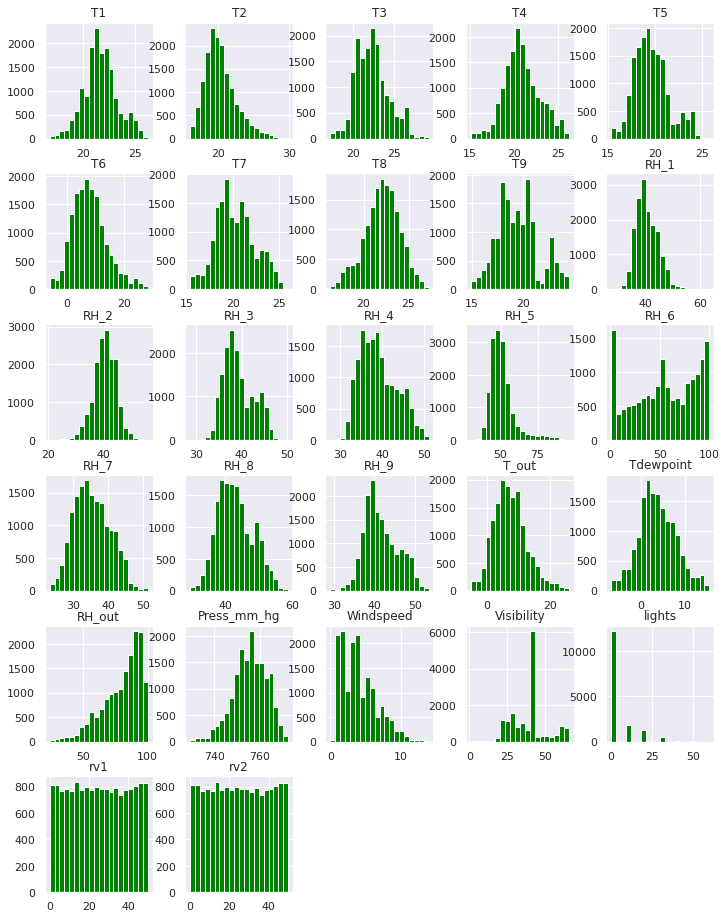

In [42]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16),color='green') ;

### Focussed displots for RH_6 , RH_out , rv1 , rv2 , Visibility , Windspeed due to irregular distribution

### Using Plotly helps us visualize data better as it allows us to interact with the plot like zoom in to the distribution and hover around to locate the values corresponding to axis value

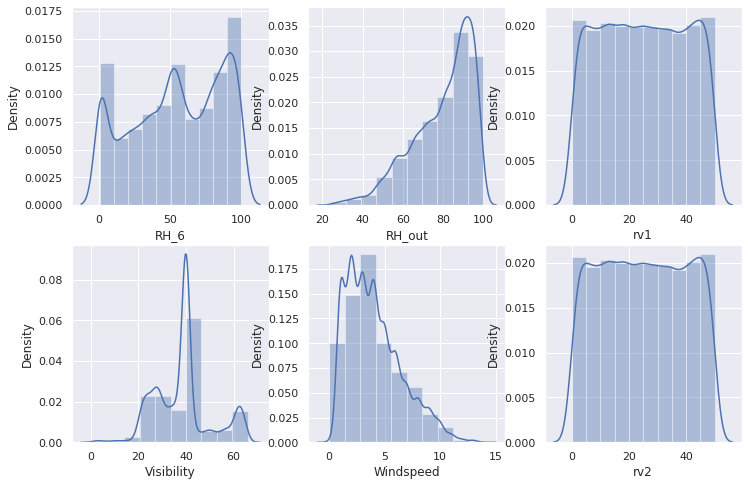

In [43]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,3,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])
vis5 = sns.distplot(feature_vars["rv1"],bins=10, ax=ax[0][2])
vis6 = sns.distplot(feature_vars["rv2"],bins=10, ax=ax[1][2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dc0b85990>]],
      dtype=object)

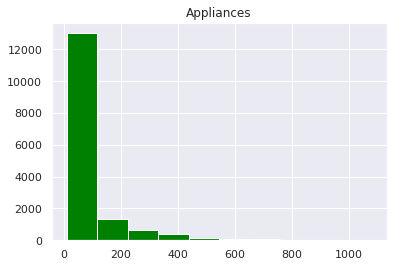

In [44]:
# Distribution of values in Applainces column
target_vars.hist(color='green',bins=10)

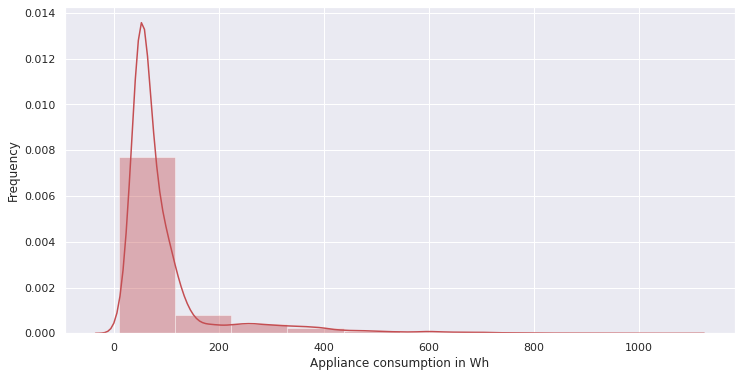

In [45]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars ,color="r",bins=10)

In [46]:
# Check the distribution of values in Appliances column
slr['Appliances'].value_counts().head(15)

50     4368
60     3282
40     2019
70     1560
80     1205
90     1015
100     978
110     736
30      723
120     502
20      343
130     330
140     223
150     144
160      90
Name: Appliances, dtype: int64

# **Observations**
Temperature - All the columns follow normal distribution except T9     
Humidity - All columns follow normal distribution except RH_6 and RH_out ,     primarly because these sensors are outside the house     
Appliance - This column is postively skewed , most the values are around mean   100 Wh . There are outliers in this column     
Visibilty - This column is negatively skewed        
Windspeed - This column is postively skewed      

In [47]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.315429
dtype: float64


# **Correlation Plots**